<img src="Imagenes/hollywood.jpg">

# TMDB 5000 Movie Dataset
IMDb, formerly known as Internet Movie Database, is an online database of information related to films, television programs 
and video games, including cast, production crew, fictional characters, biographies, plot summaries, trivia and reviews, operated by IMDb.com, Inc., a subsidiary of Amazon. As of December 2017, IMDb has approximately 4.7 million titles (including episodes) and 8.3 million personalities in its database,[2] as well as 83 million registered users.

This dataset only contains 5000 therefore, valid conclusions can not be drawn since we do not know much data and some data of movies that we have, are not entirely credible. Some producers do not share the correct data of the movies, therefore, this analysis is merely indicative.

In this analaysis we decided to focus on the development of the movie's industry throw time. Seeing the differences betweeen the beggining of the movie's industry and our time.

Source: Kaggle: https://www.kaggle.com/tmdb/tmdb-movie-metadata

###### Analysis made by: Alfonso Navarro Rey, Oscar Muñoz Trani & Carmen González-Conde
01/26/2018


## 1. IMPORTS SECTION

This section contains all imports that we use in this analysis.

In [ ]:
# Hiding all warnings.
import warnings
warnings.filterwarnings('ignore')
import Utils as utl
import pandas as pd 
import json as js
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt
from ggplot import *
import random
import seaborn
import pylab
import folium
import plotly 
plotly.tools.set_credentials_file(username='alfnavre', api_key='O1CahD6GsA3PPFhGzr91')
import plotly.plotly as py
import plotly.graph_objs as go

## 2. READING FILES SECTION

In this section we will read the .csv files provided by kaggle. 

In [ ]:
file = "~\\Documents\\PRACTICA_PYTHON\\BaseDeDatos\\tmdb_5000_credits.csv"
file2 = "~\\Documents\\PRACTICA_PYTHON\\BaseDeDatos\\tmdb_5000_movies.csv"

dfCredits = pd.read_csv(file, encoding="cp437", delimiter = ',')
dfMovies = pd.read_csv(file2, encoding="cp437", delimiter = ',')

## 3. SETTING UP DATAFRAMES

The objective of this section is to give the dataframe the shape we want plus additional changes that will help us along the study. We added two additional columns (profitable, is_profitable) and deleted other that we didn't consider relevant to our study. We consider that a movie is profitable when the revenue of a movie doubles its budget *.

*Credits: https://stephenfollows.com/how-movies-make-money-hollywood-blockbusters/
##### "Is it often claimed that marketing a Hollywood movie can cost up to twice of the cost of the film’s budget"

In [4]:
# We change the name of the column to movie_id to be able to merge by that column after
dfMovies = dfMovies.rename(columns= {'id': 'movie_id'})
# Merging both .csv
dfMerge = pd.merge(dfCredits, dfMovies, on='movie_id')
# This is vital for running the whole program. Please modify the head if you don't want our laptop to die while looping ;) 
#dfMerge = dfMerge.head(500)
# We convert the whole column to datetime
dfMerge['release_year'] = pd.to_datetime(dfMerge['release_date']).dt.year
# We figured there is data with budget and revenue 0 that are incorrect, it is 5 records we will eliminate from the dataframe.
dfMerge = dfMerge[(dfMerge['revenue'] != 0) & (dfMerge['budget'] != 0)]
# We reset inex to avoid later problems
dfMerge = dfMerge.reset_index()
# Setting up Profitable columns
dfMerge['profitable'] = ((dfMerge['revenue'] - dfMerge['budget']) / dfMerge['budget']) * 100
dfMerge['is_profitable']  = dfMerge['revenue'] >= 2 * dfMerge['budget'] 

# Setting up our main dataframe
dfMain = dfMerge[['movie_id','original_title', 'original_language', 'budget', 'popularity', 'release_year', 
                  'revenue', 'runtime', 'status','vote_average', 'vote_count', 'is_profitable', 'profitable']]

In [5]:
# Saving memory
dfMovies = []
dfCredits = []

## 4. ANALYSING DATA

This forth section contains the body of our analysis. We divided it into four sections. Analysing the keywords of the movies, the correlation between data in the dataset and our additional dataframes. A development of the movies over time (budget, genres, revenue...), the evolution of the women/men in the cinematographic history and the genres in which the most profitable companies invest.

## 4.1. Keywords

This section aims to analyse all keywords in the dataframe, starting with the most popular in our century and followed by the 25 most popular of all years. 

In [ ]:
# Obtaining dataframe we will use in this section
# Obtaining the keywords dataframe
dfKW = utl.getJSONDataFrame(pd, dfMerge, 'keywords')

### 4.1.1.  Most popular keywords of the 21st century

For a start, we decided to use the library WordCloud to introduce our analysis.

In [ ]:
# List of the movies of the 21st century.
df21Century = dfMain[(dfMain['release_year'] >= 2000) & (dfMain['release_year'] < 2100) ]
# We get the ids from the selected movies
listIdsMovies = utl.getMovieIds(df21Century)
# Getting the list of keywords
keybordsList = utl.getKeyboardsFromMovies(dfKW, listIdsMovies)
# Words not to take into account
sWords = {'and', 'in', 'of', 'the', 'on','to', 'title','reference','female','male','by'}
# We create the word cloud
wc = WordCloud(background_color='white').generate(keybordsList)
plt.rcParams["figure.figsize"] = [15, 10]
plt.imshow(wc, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Saving memory
df21Century = [] 
listIdsMovies = []
keybordsList = []

### 4.1.2. The 25 most popular keywords of all movies

In [ ]:
# We aggrupate keybords by name, then sort them by count.
dfKWGrouped = dfKW.groupby(['name']).count().reset_index()
# Renaming the column.
dfKWGrouped = dfKWGrouped.rename(columns ={"movie_id": 'count'})
# Sorting the keybords and getting the first 25
dfKWGrouped = dfKWGrouped.sort_values(by="count", ascending=False).head(25)
# Convert the dataframe to a list which only contains the sorted Keybords.
keywordsList = dfKWGrouped['name'].tolist()
# Convert the dataframe to a list which only contains the sorted Counts.
countList = dfKWGrouped['count'].tolist()
# Obtaining the length of the objects list
y_pos = np.arange(len(keywordsList))

# Creating the plot
plt.figure(figsize=(12, 8))
plt.barh(y_pos, countList, align='center', alpha=0.5, color = (0.5,0.1,0.5,0.6))
plt.yticks(y_pos, keywordsList)
plt.xlabel('count', fontsize=16)
plt.ylabel('keywords', fontsize=16)
plt.title('25 Most Popular keywords of all movies', fontsize=18, bbox={'facecolor':'1.9', 'pad':3})
# Showing the plot
plt.show()


In [ ]:
# Saving memory
dfKW = []
dfKWGrouped = []
keybordsList = []
countList = []

## 4.2. Correlation
This section will study the correlation of the main dataframe (only numeric columns) and some other additional dataframes that we consider relevant.

### 4.2.1. Main Dataframe correlation

In [ ]:
# Lists of numeric data types
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# Obtain dataframe containing only numeric data
dfMainNumerics = dfMain.select_dtypes(include=numerics)
# Creating figure
plt.figure(figsize=(12, 8))
seaborn.heatmap(dfMainNumerics.corr(), annot = True, fmt = ".3f", linewidths = .5, cmap = 'Blues_r');
plt.title('Main dataframe correlation', fontsize=18, bbox={'facecolor':'1.9', 'pad':3})
plt.show()

In [ ]:
# Saving memory
dfMainNumerics = []

We consider that there is correlation betweeen the variables if its > 0.7. We won't use the value of profitable becuase we created that column from revenue and budget. Therefore, we will study the correlation between vote_count and revenue/ popularity

### 4.2.2. Studying the correlation between vote_count & revenue
The highest the revenue and the vote_count are, the movies are more profitable as we see in the graph.

In [ ]:
p = ggplot(aes(x='revenue', y='vote_count', color='is_profitable'), data=dfMain) +\
        geom_point() +\
        scale_fill_brewer() +\
        ggtitle("Correlation between revenue and vote_count")
        
t = theme_gray()
t._rcParams['font.size'] = 15 # Legend font size
t._rcParams['xtick.labelsize'] = 10 # xaxis tick label size
t._rcParams['ytick.labelsize'] = 10 # yaxis tick label size
t._rcParams['axes.labelsize'] = 8  # axis label size
p + t

According to the graph, movies that have more revenue have also more vote_count. We decided to divide our data into whether the movie was profitable or not, we see there are only 4 movies that have more vote_count, but still got less than 0.5 millions of revenue. 

### 4.2.3. Crew & Cast correlation

We inverted some time in reading what other people were studying in this dataset. A question came within many others.
#### Does the number of crew influece whether the movie is more proffitable or it doesn't? And the number of cast?
We will look into it now.

In [ ]:
# We obtain a dataframe containing the movie, crew/cast count and revenue to see its correlacion
df = utl.addColCountJson(pd, dfMerge, ['crew', 'cast'], ['profitable', 'revenue'])

# Creating figure
plt.figure(figsize=(6, 4))
seaborn.heatmap(df.corr(), annot = True, fmt = ".3f", linewidths = .5, cmap = 'BuPu');
plt.title('Cast/Crew count dataframe correlation', fontsize=18, bbox={'facecolor':'1.9', 'pad':3})
plt.show()

Answering the question above, no, the greater amount of cast and crew doesnn't influence on profit nor revenue.

In [ ]:
# Saving memory
df = []
dfMergeCastCrew = []

## 4.3. Evolution of the movies over the years
In this section, we will analyze certain variables such as budget vs revenue and genres of our dataset over the years.

### 4.3.1.  Evolution of the budget and revenue of the movies over the years


In [ ]:
# We select the variables and group by the release_year
df = dfMain[['release_year','revenue','budget']].groupby('release_year', as_index=False).sum()

fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
#ax = plt.subplot(111)

#first strategy is to use hollow bars with fill=False so that they can be reasonably superposed / contained within one another:
ax.bar(df['release_year'], df['budget'],width=0.3,edgecolor='g',align='center', fill=False) #the green bar has the smallest width as it is contained within the other two
ax.bar(df['release_year'], df['revenue'],width=0.6,edgecolor='b',align='center', fill=False) #the blue bar has a greater width than the green bar
ax.set_xlabel('Evolution Budget vs Revenue',fontsize=18, bbox={'facecolor':'1.9', 'pad':3})
ax.set_ylabel('Thousands of millions',fontsize=16)
plt.show()

We can see that over the years both the expense and the box office has been increasing exponentially and that there is almost no year in which the investment exceeds the box office. The movie industry is an industry in which more and more is invested due to its high profitability.

### 4.3.2.  Difference between Budget & Revenue of 30 Movies Top/Low vote_average


In [ ]:
# We will use our function to make a subset  30 movies top budget
dfTopBudget = utl.getTopDataframe(dfMain, 'vote_average', 30)
labels = (dfTopBudget['original_title'])
ax = dfTopBudget[['budget','revenue']].plot(kind='barh', figsize=(15, 10), legend=True, fontsize=12)
ax.set_yticklabels(labels, minor=False)
ax.set_ylabel("Movies", fontsize=16)
ax.set_xlabel("Thousands of Millions", fontsize=16)
ax.set_title("Difference Budget/Revenue of 30 Movies Top vote_average", fontsize=18, bbox={'facecolor':'1.9', 'pad':3})
plt.show()



In [ ]:
# We will use our function to make subset with 30 movies lowest vote_average
dfLowerBudget = utl.getLowerDataframe(dfMain, 'vote_average', 30)

labels = dfLowerBudget['original_title']
ax = dfLowerBudget[['budget','revenue']].plot(kind='barh', figsize=(15, 10), legend=True, fontsize=12)
ax.set_yticklabels(labels, minor=False)
ax.set_ylabel("Movies", fontsize=16)
ax.set_xlabel("Thousands of Millions", fontsize=16)
ax.set_title("Difference Budget/Revenue Movies Lower vote_average", fontsize=18, bbox={'facecolor':'1.9', 'pad':3})
plt.show()

It can be observed that the films with the highest vote are the ones with the highest profitability, while those with the worst scores have even losses of money.

In [ ]:
# Saving memory
df = []

In [ ]:
# We will use our function to make subset with 30 movies lowest Budget
dfLowerBudget = utl.getLowerDataframe(dfMain, 'budget', 30)
df = dfLowerBudget[['budget','revenue', 'original_title']]


# Showing the plot
ind = np.arange(df.shape[0])
width = 0.35

# Set the colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'g']


def autolabel(bars):
    # attach some text labels
    for bar in bars:
        width = bar.get_width()
        ax.text(width*0.95, bar.get_y() + bar.get_height()/2,
                '%d' % int(width+10), va='bottom')

# make the plots
fig, ax = plt.subplots(figsize=(15,10))
a = ax.barh(ind, df.budget, width, color = colors) # plot a vals
b = ax.barh(ind + width, df.revenue, width, color = colors, alpha=0.5)  # plot b vals
ax.set_yticks(ind + width)  # position axis ticks
ax.set_yticklabels(df.original_title)  # set them to the names
ax.set_ylabel('Movies', fontsize=16)
ax.set_xlabel('Thousands of Millions', fontsize=16)
ax.set_title("Difference Budget/Revenue Movies Lowest Budget", fontsize=18, bbox={'facecolor':'1.9', 'pad':3})
ax.legend((a[0], b[0]), ['budget', 'revenue'], loc='center right')

#autolabel(a)
autolabel(revenue)

plt.show()

* We can see any movies reaches 100 million budget
* Also we can see the movies with highest revenue are PARANOMAL ACTIVITY and THE BLAIR WITCH PROJECT, last one is like to blockbuster movie with huge budget
* All movies only 30% make revenue

In [ ]:
# Saving memory
df = []

In [ ]:
# We will use our function to make subset with 30 movies lowest Budget
dfTopBudget = utl.getTopDataframe(dfMain, 'budget', 30)
df = dfTopBudget[['budget','revenue', 'original_title']]


# Showing the plot
ind = np.arange(len(df))
width = 0.35

# Set the colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'g']


def autolabel(bars):
    # attach some text labels
    for bar in bars:
        width = bar.get_width()
        ax.text(width*0.95, bar.get_y() + bar.get_height()/2,
                '%d' % int(width+100), ha= 'left', va='bottom')


# make the plots
fig, ax = plt.subplots(figsize=(15,10))
a = ax.barh(ind, df.budget, width, color = colors) # plot a vals
b = ax.barh(ind + width, df.revenue, width, color = colors, alpha=0.5)  # plot b vals
ax.set_yticks(ind + width)  # position axis ticks
ax.set_yticklabels(df.original_title)  # set them to the names
ax.set_ylabel('Movies', fontsize=16)
ax.set_xlabel('Thousands of Millions', fontsize=16)
ax.set_title("Difference Budget/Revenue Movies Top Budget", fontsize=18, bbox={'facecolor':'1.9', 'pad':3})
ax.legend((a[0], b[0]), ['budget', 'revenue'], loc='center right')

#autolabel(a)
autolabel(revenue)

plt.show()

* We can see the movie with highest renenue is AVATAR and the movies blockbuster are mostly comic characters. 
* Also we can see the budget is similar between all movies
* All movies have revenues very differents and the success is related to a large budget

In [ ]:
# Saving memory
df = []

### 4.3.2. Evolution of the genres of the movies over the years

One of the factors that we think would be interesting for the study is the evolution of genres in the movie industry.

In [7]:
# We obtain the dataframes we will use
dfGenres = utl.getJSONDataFrame(pd, dfMerge, 'genres')

longitud df -->  8559 Contador -->  8559


In [ ]:
# Merge of the dataframes
dfMainGenres = dfMain.merge(dfGenres, on = 'movie_id')
dfMainGenres['count'] = 0
# We pivot the table in order to be able to run the plot
dfMainGenres = dfMainGenres.pivot_table(dfMainGenres, index=['release_year','name'], aggfunc='count')['count']
dfMainGenres = dfMainGenres.unstack()

# Obtain a dictionary of colors
colors = utl.getColorsDictionary()
# We create the figure
fig, ax = plt.subplots(figsize=(18,8))

# For every column (which are the genres), we will draw a line across the plot symbolizing the specific genre.
for i in range(len(dfMainGenres.columns)):
    ax.plot(dfMainGenres.iloc[:, i],  color = colors.get(i) )

plt.ylabel('Count',fontsize=16);
plt.xlabel('Years', fontsize=16);
plt.title('Evolution of genres through the years', fontsize=18, bbox={'facecolor':'1.9', 'pad':3})
pylab.legend(loc = 'upper left')
plt.show()

The results of the graph indicate that the first movies created were in the 20s and that they used the drama as a unique theme.
As our dataset possesses only 5000 movies, we believe it is better to analyze the 3 predominant genres in the 21st century. These genres are: drama, comedy and Thriller. Now, we will get the most popular actors for that genres.

### Most popular actor by genre on the 21st Century

In [ ]:
# We obtain the dataframes we will use
dfCast = utl.getJSONDataFrame(pd, dfMerge, 'cast')

In [ ]:
# Merging
dfGenderCast = dfGenres.merge(dfCast,on='movie_id')
dfGenderCast = pd.DataFrame(dfGenderCast.groupby(('name_x','name_y')).count()['order'])
dfMainGenres = dfGenres.merge(dfMain[dfMain["release_year"] > 2000 ], on='movie_id')
# These are the most popular genres
genreList = ["Drama", "Comedy", "Thriller"]
# We create a new dataframe containing the columns genre and actor that we will fill
dfPopularActorGenre21st = pd.DataFrame(columns=['genre', 'actor'])
# Filling the new dataframe with the most popular actor for each genre
i = 0
for genre in genreList:
    nameActor = dfGenderCast.loc[genre].sort_values("order", ascending = False).head(1).index.get_level_values('name_y')[0]
    dfPopularActorGenre21st.loc[i, 'genre'] = genre
    dfPopularActorGenre21st.loc[i, 'actor'] = nameActor
    i = i + 1

In [ ]:
# Showing the dataframe as table   

trace0 = go.Table(
  type = 'table',
  header = dict(
    values = ['<b>Genre</b>', '<b>Actor</b>'],
    line = dict(color = 'red'),
    fill = dict(color = 'lightblue'),
    align = 'center',
    font = dict(family='Courier New, monospace',color = 'black', size = 16)
  ),
  cells = dict(
    values = [dfPopularActorGenre21st.genre, dfPopularActorGenre21st.actor],
    line = dict(color = 'red'),
    fill = dict(color = 'white'),
    align = 'center',
    font = dict(color = 'black', size = 11)
    ))

layout = dict(width=500, height=300)
data = [trace0]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename = 'styled_table')

As the results show, the most popular actors for that genres in the 21st Century are Matt Damon, Owen Wilson and Bruce Willis. No women is part of that chart. We are going to investigate the percentage of women in those genres.

### % of females in the most popular genres of the 21st Century
We decided to look into the female percentage in the previous analyzed genres for obvious reasons.

In [ ]:
# We only considerate appropiate to use non NaN values or values that equal 1 or 2
dfCast = dfCast[(dfCast['gender'] == 1) | (dfCast['gender'] == 2)]
# Merge of dfMain with genres and cast
dfGenderCast = dfMainGenres.merge(dfCast, on='movie_id')
# Grouping by actor and gender
dfGenderActorSex = dfGenderCast.groupby(by= ['name_x','gender']).count()['name_y']
dfGenderActorSex.unstack(level= 1)

# We create an empty dataframe that will containg the genre and the percent of females casting in that genre
dfFemalePercent = pd.DataFrame(columns=['genre', 'PercentFemale'])

# We define the most popular genres of the 21st Century
genreList = ["Drama", "Comedy", "Thriller"]

i = 0
for genre in genreList:
    dfFemalePercent.loc[i, 'genre'] = genre
    dfFemalePercent.loc[i, 'PercentFemale'] = (dfGenderActorSex.loc[genre][1] / (dfGenderActorSex.loc[genre][2] + dfGenderActorSex.loc[genre][1]) *  100).round(1)
    i = i + 1

In [ ]:
# Showing the dataframe as table   

trace0 = go.Table(
  type = 'table',
  header = dict(
    values = ['<b>Genre</b>', '<b>PercentFemale</b>'],
    line = dict(color = 'blue'),
    fill = dict(color = 'lightgrey'),
    align = 'center',
    font = dict(family='Courier New, monospace',color = 'black', size = 16)
  ),
  cells = dict(
    values = [dfFemalePercent.genre, dfFemalePercent.PercentFemale],
    line = dict(color = 'blue'),
    fill = dict(color = 'white'),
    align = 'center',
    font = dict(color = 'black', size = 11)
    ))

layout = dict(width=500, height=300)
data = [trace0]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename = 'styled_table')

The appearance of women in 21st century movies is very low. It is at 40% or less for those genres. Which leads us to analyze the number of women vs man of all movies.

In [ ]:
dfGenderPerYear = utl.getGenderPerYear(pd, dfMain, dfCast)

p = ggplot(aes(x='release_year'), data=dfGenderPerYear) +\
    geom_line(aes(y='female_count'), color='pink') +\
    geom_line(aes(y='male_count'), color='blue') +\
    xlab("Years") +\
    ylab("Count") +\
    ggtitle("Man vs women in time")
    
t = theme_gray()
t._rcParams['font.size'] = 15 # Legend font size
t._rcParams['xtick.labelsize'] = 10 # xaxis tick label size
t._rcParams['ytick.labelsize'] = 10 # yaxis tick label size
t._rcParams['axes.labelsize'] = 8  # axis label size
p + t

As we can see in the graph, the presence of man is much greater in the film industry since the appearance of films until nowadays. As a conclusion of these data, we can affirm why the man in hollywood earns more than the woman.

In [ ]:
# To save memory
dfMainGenres = []
dfCast = []
dfGenderCast = []
dfGenderActorSex = []

### 4.3.3. The companies that earn the most, in what genres do they invest?
On Kaggle's page, they asked this question and we considered it important to analyze it.

In [8]:
# We convert the json files into a dataframe
dfProduction_companies = utl.getJSONDataFrame(pd, dfMerge, 'production_companies')
dfMainGenres = dfMain.merge(dfGenres, on = 'movie_id')

# We unite both in a single dataframe
df = dfProduction_companies.loc[:,['name','movie_id']]
dfGenresCompanies = pd.merge(df, dfMainGenres, on ='movie_id')

longitud df -->  10332 Contador -->  10332


In [12]:
# We show a table with the five companies that have profited the most from the films produced according to the initial budget.

df = dfGenresCompanies.loc[:,['profitable','budget']]
TableGenresCompanies = dfGenresCompanies.pivot_table(df, index=['name_x']).sort_values("profitable", ascending = False).head(5).round()

trace0 = go.Table(
  type = 'table',
  header = dict(
    values = ['<b>Companies</b>','<b>Budget</b>', '<b>Profitable</b>'],
    line = dict(color = 'blue'),
    fill = dict(color = 'lightgrey'),
    align = 'center',
    font = dict(family='Courier New, monospace',color = 'black', size = 16)
  ),
  cells = dict(
    values = [TableGenresCompanies.index[:],TableGenresCompanies.budget, TableGenresCompanies.profitable],
    line = dict(color = 'blue'),
    fill = dict(color = 'white'),
    align = 'center',
    font = dict(color = 'black', size = 11)
    ))

layout = dict(width=500, height=500)
data = [trace0]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename = 'styled_table')

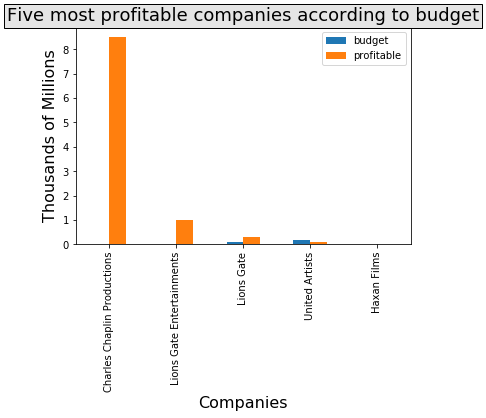

In [13]:
# We reprinted this data in a bar chart.
TableGenresCompanies.plot(kind = 'bar')
plt.title('Five most profitable companies according to budget', fontsize=18, bbox={'facecolor':'1.9', 'pad':3})
plt.xlabel('Companies', fontsize=16)
plt.ylabel("Thousands of Millions", fontsize=16)
plt.show()

You can clearly verify that the most profitable company based on your total investment and collection, is Charles Caplin Production. It is a company founded at the beginning of the twentieth century that today continue to generate high income for their productions now considered true masterpieces of silent film and comedy. The low production cost of their films, if we compare them in the monetary value of the current century and the fact that they continue to generate income from these productions, make this company stand out from the others.


##  4.4 Countries that produce the most movies

In [ ]:
# Returns a dataframe with the languages most used in movies
dfMergeLanguagesMainGB = utl.getMostUsedLanguagesDataFrame(pd, dfMain)
# Getting a dataframe with worldwide geolocations
dfGeo = utl.getGeoLocations(pd)
# We merge
dfMergeGeoLanguages = pd.merge(dfMergeLanguagesMainGB, dfGeo, on = "ISO 3166 Country Code")



In [ ]:
# Getting the countries that most movies produce

# Read the data with productions countries
dfCountries = utl.getJSONDataFrame(pd, dfMerge, 'production_countries')
# Groupby to get repetitions per country
dfCountries2 = dfCountries.groupby(["iso_3166_1", "name"]).size().reset_index(name="Time")
# Rename column to be able to merge with geolocations
dfCountries2.columns = ['ISO 3166 Country Code', 'Country', 'Time']
dfCountriesMerge = pd.merge(dfGeo, dfCountries2)
dfCountriesMerge.head()

# Make a data frame with dots to show on the map
dfCountriesMerge

row_index = dfCountriesMerge.Time == 2908
# then with the form .loc[row_indexer,col_indexer]
dfCountriesMerge.loc[row_index, 'Time'] = 800.0
 
# Make an empty map
m = folium.Map(location=[20,0], tiles="Mapbox Bright", zoom_start=2)
 
# I can add marker one by one on the map
for i in range(0,len(dfCountriesMerge)):
   folium.Circle(
      location=[dfCountriesMerge.iloc[i]['Latitude'], dfCountriesMerge.iloc[i]['Longitude']],
      popup=dfCountriesMerge.iloc[i]['ISO 3166 Country Code'],
      radius=dfCountriesMerge.iloc[i]['Time']*3000,
      color='blue',
      fill=True,
      fill_color='blue'
      ).add_to(m)

# Show the plot
display(m)

We can see that the countries that produce the most movies are the United States (which stands out above the rest) followed by the United Kingdom.

## 5. Final Conclusion